# Getting started with ctapipe

- This starts from the output of simtel_array for 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

from ctapipe.io import EventSource
from ctapipe.utils import get_dataset_path
from ctapipe.visualization import CameraDisplay


Here we use a test file with only few events made public for test purposes.
For MACE/SiPM camera, the an `EventSource` plugin is necessary

Note that the lowest output is directly from simtel_array

In [23]:
source = EventSource(get_dataset_path("gamma_prod5.simtel.zst"), max_events=2)

In [24]:
source

allowed_tels,None,"list of allowed tel_ids, others will be ignored. If None, all telescopes in the input stream will be included (default: None)"
atmosphere_profile_choice,AtmosphereProfileKind.AUTO,"Which type of atmosphere density profile to load from the file, in case more than one exists. If set to AUTO, TABLE will be attempted first and if missing, FIVELAYER will be loaded. (default: AtmosphereProfileKind.AUTO)"
back_seekable,False,Require the event source to be backwards seekable. This will reduce in slower read speed for gzipped files and is not possible for zstd compressed files (default: False)
calib_scale,1.0,Factor to transform ADC counts into number of photoelectrons. Corrects the DC_to_PHE factor. (default: 1.0)
calib_shift,0.0,Factor to shift the R1 photoelectron samples. Can be used to simulate mis-calibration. (default: 0.0)
focal_length_choice,FocalLengthKind.EFFECTIVE,"If both nominal and effective focal lengths are available in the SimTelArray file, which one to use for the `~ctapipe.coordinates.CameraFrame` attached to the `~ctapipe.instrument.CameraGeometry` instances in the `~ctapipe.instrument.SubarrayDescription`, which will be used in CameraFrame to TelescopeFrame coordinate transforms. The 'nominal' focal length is the one used during the simulation, the 'effective' focal length is computed using specialized ray-tracing from a point light source (default: FocalLengthKind.EFFECTIVE)"
gain_selector_type,ThresholdGainSelector,"The name of a GainSelector subclass. Possible values: ['ManualGainSelector', 'ThresholdGainSelector'] (default: ThresholdGainSelector)"
input_url,/Users/atreyeesinha/.cache/ctapipe/minio-cta.zeuthen.desy.de/dpps-testdata-public/data/ctapipe-test-data/v1.1.0/gamma_prod5.simtel.zst,Path to the input file containing events. (default: traitlets.Undefined)
max_events,2,Maximum number of events that will be read from the file (default: None)
override_obs_id,None,Use the given obs_id instead of the run number from sim_telarray (default: None)
select_gain,None,"Whether to perform gain selection. The default (None) means only select gain of physics events, not of calibration events. (default: None)"


In [25]:
for event in source:
     print(event.index.event_id)

4009
5101


In [26]:
event

ctapipe.containers.ArrayEventContainer:
                       index.*: event indexing information with default None
                          r0.*: Raw Data with default None
                          r1.*: R1 Calibrated Data with default None
                         dl0.*: DL0 Data Volume Reduced Data with default None
                         dl1.*: DL1 Calibrated image with default None
                         dl2.*: DL2 reconstruction info with default None
                  simulation.*: Simulated Event Information with default None
                                with type <class
                                'ctapipe.containers.SimulatedEventContainer'>
                     trigger.*: central trigger information with default None
                         count: number of events processed with default 0
                    pointing.*: Array and telescope pointing positions with
                                default None
                 calibration.*: Container for calibra

In [27]:
print(event.dl1)

{'tel': {}}


In [28]:
print(event.r1)

{'tel': {26: {'calibration_monitoring_id': None,
              'event_time': <Time object: scale='tai' format='mjd' value=0.0>,
              'event_type': <EventType.SUBARRAY: 32>,
              'first_cell_id': None,
              'module_hires_local_clock_counter': None,
              'pedestal_intensity': None,
              'pixel_status': array([4, 4, 4, ..., 4, 4, 4], shape=(1764,), dtype=uint8),
              'selected_gain_channel': array([0, 0, 0, ..., 0, 0, 0], shape=(1764,), dtype=int8),
              'waveform': array([[[ 0.5449172 ,  0.7336623 ,  0.85949236, ..., -0.08423293,
          0.10451212,  0.37714386],
        [ 0.26182497,  0.15617064,  0.26182497, ..., -0.66793317,
         -0.71019495, -0.71019495],
        [-0.5535298 , -0.15927683,  0.27647644, ...,  0.62922907,
          0.64997923,  0.64997923],
        ...,
        [ 0.00745648, -0.11931664, -0.28834748, ...,  0.00745648,
          0.21874502,  0.366647  ],
        [ 0.06618547, -0.12305467, -0.24921475, 

In [29]:
print(event.r0)

{'tel': {26: {'waveform': array([[[267, 276, 282, ..., 237, 246, 259],
        [254, 249, 254, ..., 210, 208, 208],
        [214, 233, 254, ..., 271, 272, 272],
        ...,
        [242, 236, 228, ..., 242, 252, 259],
        [245, 236, 230, ..., 248, 246, 248],
        [229, 231, 233, ..., 236, 238, 234]]],
      shape=(1, 1764, 25), dtype=uint16)},
         27: {'waveform': array([[[282, 286, 281, ..., 258, 245, 248],
        [238, 238, 246, ..., 242, 240, 232],
        [246, 244, 238, ..., 240, 231, 232],
        ...,
        [238, 236, 237, ..., 260, 266, 268],
        [255, 258, 254, ..., 277, 283, 279],
        [233, 230, 232, ..., 237, 233, 231]]],
      shape=(1, 1764, 25), dtype=uint16)},
         29: {'waveform': array([[[239, 243, 258, ..., 235, 240, 238],
        [272, 259, 245, ..., 232, 232, 226],
        [229, 232, 240, ..., 224, 222, 219],
        ...,
        [243, 245, 246, ..., 217, 213, 212],
        [260, 266, 270, ..., 234, 231, 227],
        [251, 247, 248, ...,

In [37]:
print(event.simulation.shower)

{'alt': <Angle 1.22173047 rad>,
 'az': <Angle 6.28318501 rad>,
 'core_x': <Quantity -737.00970459 m>,
 'core_y': <Quantity -266.60095215 m>,
 'energy': <Quantity 1.74547136 TeV>,
 'h_first_int': <Quantity 20947.52539062 m>,
 'shower_primary_id': 0,
 'starting_grammage': <Quantity 0. g / cm2>,
 'x_max': <Quantity 286.75674438 g / cm2>}


In [38]:
print(event.r0.tel.keys())

dict_keys([26, 27, 29, 47, 53, 59, 69, 73, 121, 122, 124, 148, 162, 166])


In [39]:
teldata = event.r0.tel[26]
print(teldata)
teldata

{'waveform': array([[[267, 276, 282, ..., 237, 246, 259],
        [254, 249, 254, ..., 210, 208, 208],
        [214, 233, 254, ..., 271, 272, 272],
        ...,
        [242, 236, 228, ..., 242, 252, 259],
        [245, 236, 230, ..., 248, 246, 248],
        [229, 231, 233, ..., 236, 238, 234]]],
      shape=(1, 1764, 25), dtype=uint16)}


ctapipe.containers.R0CameraContainer:
                      waveform: numpy array containing ADC samples: (n_channels,
                                n_pixels, n_samples) with default None

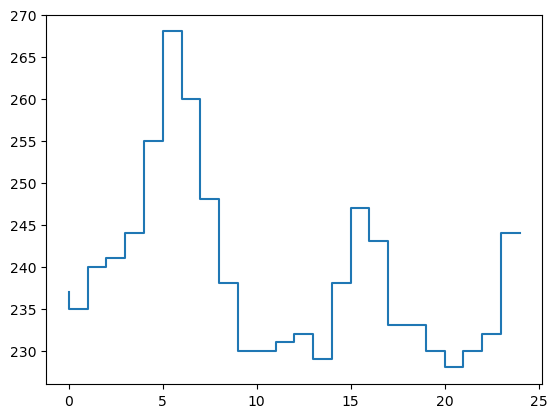

In [43]:
#Get the trace
trace = teldata.waveform[0][719]
plt.plot(trace, drawstyle="steps")

`ctapipe.calib.camera` includes classes for doing automatic trace integration